In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [24]:
# 1️⃣ Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

# 2️⃣ Basic EDA
print("\nSummary statistics:")
print(X.describe().T.head())

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']

Summary statistics:
                 count        mean         std  ...        50%       75%        max
mean radius      569.0   14.127292    3.524049  ...   13.37000   15.7800    28.1100
mean texture     569.0   19.289649    4.301036  ...   18.84000   21.8000    39.2800
mean perimeter   569.0   91.969033   24.298981  ...   86.24000  104.1000   188.5000
mean area        569.0  654.889104  351.914129  ...  551.10000  782.7000  2501.0000
mean smoothness  569.0    0.096360    0.014064  ...    0.09587    0.1053     0.1634

[5 rows x 8 columns]


In [3]:
pd.concat([X, y], axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
print(data.keys())
print(data.feature_names)
print(data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [25]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
# Map 0 and 1 in y to their corresponding target names
y_named = y.map({0: data.target_names[0], 1: data.target_names[1]})
y_named.head()

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: target, dtype: object

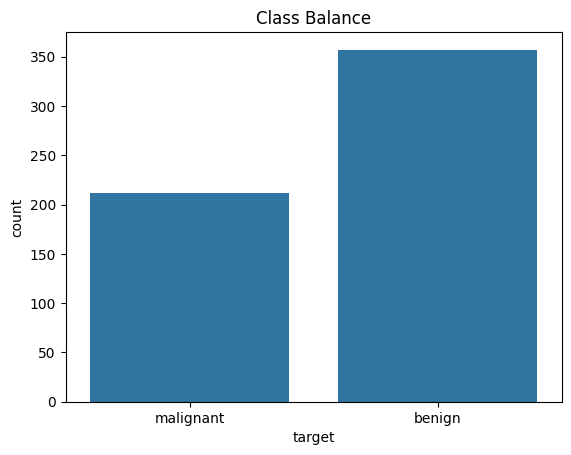

In [6]:
# Check class balance
sns.countplot(x=y_named)
plt.title("Class Balance")
# plt.savefig("class_balance.png")
plt.show()

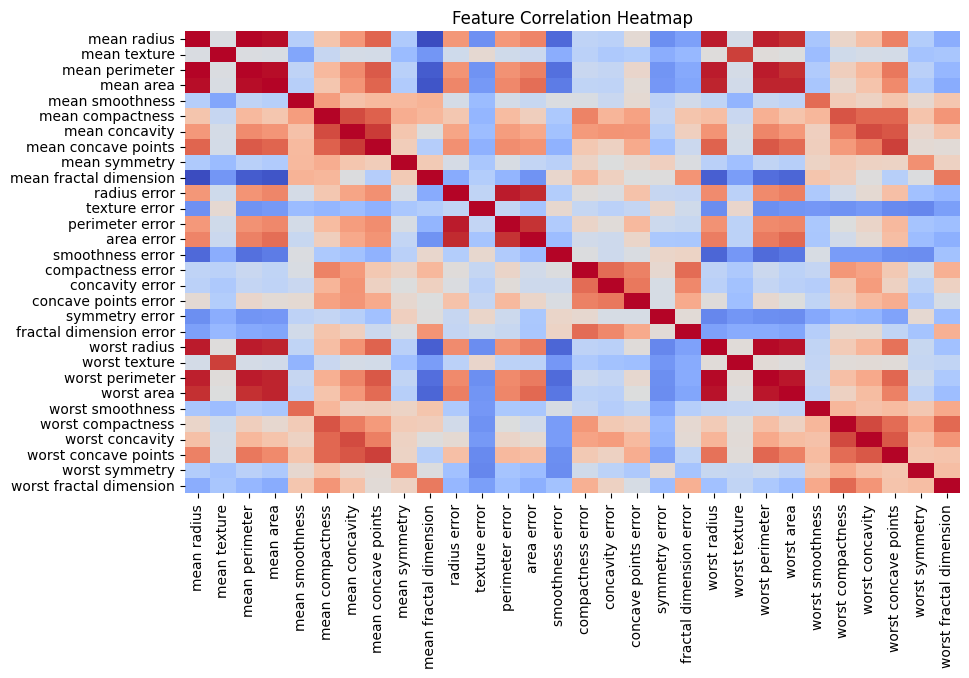

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlation Heatmap")
# plt.savefig("Feature_Correlation.png")
plt.show()

In [8]:
# 3️⃣ Train-Test Split (Stratified to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

# Save split data for next script
# X_train.to_csv("X_train.csv", index=False)
# X_test.to_csv("X_test.csv", index=False)
# y_train.to_csv("y_train.csv", index=False)
# y_test.to_csv("y_test.csv", index=False)

Train size: (455, 30)  Test size: (114, 30)


In [26]:
pd.concat([X_test, y_test], axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,0.8426,1.1990,7.158,106.400,0.006356,0.047650,0.038630,0.015190,0.01936,0.005252,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050,0
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,0.1415,0.9671,0.968,9.704,0.005883,0.006263,0.009398,0.006189,0.02009,0.002377,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083,1
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.050,0.009680,0.038560,0.034760,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830,0
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.580,0.007257,0.018050,0.018320,0.010330,0.01694,0.002001,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469,1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.051980,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,0.7576,1.5090,4.554,87.870,0.006016,0.034820,0.042320,0.012690,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.4098,0.15730,0.3689,0.08368,0
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,0.4309,1.0680,2.796,39.840,0.009006,0.041850,0.032040,0.022580,0.02353,0.004984,16.11,18.33,105.90,762.6,0.1386,0.28830,0.1960,0.14230,0.2590,0.07779,1
257,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,0.6592,1.0590,4.061,59.460,0.010150,0.045880,0.049830,0.021270,0.01884,0.008660,17.73,22.66,119.80,928.8,0.1765,0.45030,0.4429,0.22290,0.3258,0.11910,0
228,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,0.2449,1.0660,1.445,18.510,0.005169,0.022940,0.030160,0.008691,0.01365,0.003407,14.20,31.31,90.67,624.0,0.1227,0.34540,0.3911,0.11800,0.2826,0.09585,1


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [11]:
# Load data
# X_train = pd.read_csv("X_train.csv")
# X_test = pd.read_csv("X_test.csv")
# y_train = pd.read_csv("y_train.csv").values.ravel()
# y_test = pd.read_csv("y_test.csv").values.ravel()

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [16]:
trained_models = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    print("CV Accuracy Scores:", scores)
    print("Mean CV Accuracy:", scores.mean())

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trained_models[name] = [model, y_pred]

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Training Logistic Regression
CV Accuracy Scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean CV Accuracy: 0.945054945054945
Test Accuracy: 0.9649122807017544
ROC-AUC: 0.9573412698412699
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


🔹 Training Random Forest
CV Accuracy Scores: [0.96703297 0.95604396 0.93406593 0.96703297 0.98901099]
Mean CV Accuracy: 0.9626373626373628
Test Accuracy: 0.956140350877193
ROC-AUC: 0.9503968253968255
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95    

In [17]:
trained_models

{'Logistic Regression': [LogisticRegression(max_iter=10000),
  array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
         1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
         0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
         1, 0, 1, 1])],
 'Random Forest': [RandomForestClassifier(random_state=42),
  array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
         0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
         1, 0, 1, 1])]}

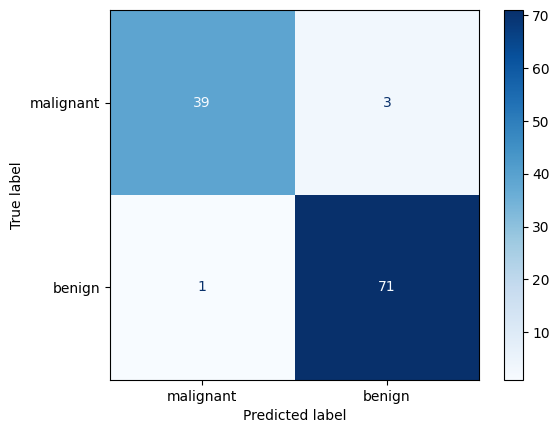

In [21]:
cm = confusion_matrix(y_test, trained_models["Logistic Regression"][1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)

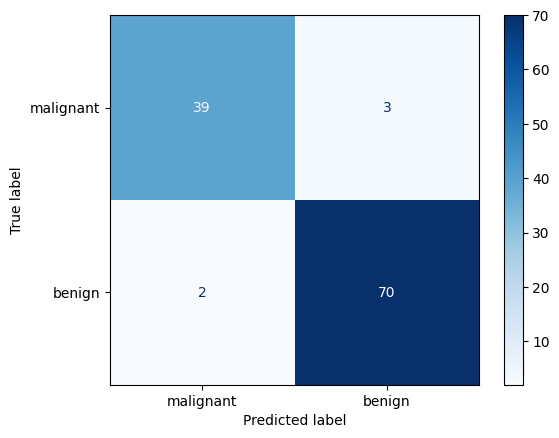

In [27]:
cm = confusion_matrix(y_test, trained_models['Random Forest'][1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)